In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator

In [52]:
file_path = '/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/CCK8-Transfection_Plots/20231211_CCK8-Transfection_DIPLibrary_reducedserum.xlsx'
sheet_name = 'combined' 
df = pd.read_excel(file_path, sheet_name=sheet_name)

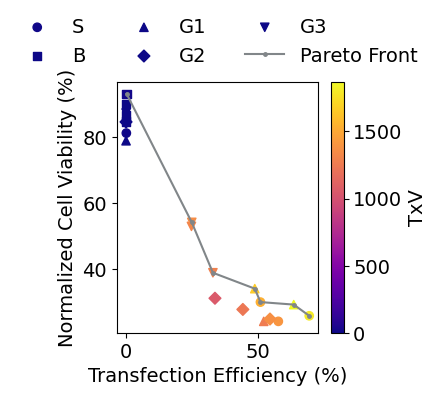

In [59]:
# Create a dictionary to map each polymer to a unique marker
polymer_markers = {
    'S': 'o',
    'B': 's',
    'G1': '^',
    'G2': 'D',
    'G3': 'v'
}

# Set global font size to 14 for all text in the plot
plt.rcParams.update({'font.size': 14})

color_gray = "#818689"
df['TxV'] = df['Viability'] * df['Transfection']

# Use the plasma colormap for a vibrant yet complementary color scheme
colormap = plt.cm.plasma
normalize = mcolors.Normalize(vmin=min(df['TxV']), vmax=max(df['TxV']))

plt.figure(figsize=(3.25, 3.25))

# Plot each polymer with its unique marker
for polymer, marker in polymer_markers.items():
    subset = df[df['Variables'] == polymer]
    sc = plt.scatter(subset['Transfection'], subset['Viability'], c=subset['TxV'], cmap=colormap, norm=normalize, marker=marker, label=polymer)

# Add colorbar
plt.colorbar(sc, label='TxV')

# Sort and plot the Pareto front
df_sorted = df.sort_values(['Transfection', 'Viability'], ascending=[False, False])
pareto_front_df = df_sorted.copy()
pareto_front_df['CumMax'] = pareto_front_df['Viability'].cummax()
pareto_front = pareto_front_df[pareto_front_df['Viability'] >= pareto_front_df['CumMax']]

# Plot the Pareto front with increased marker size for better visibility
plt.plot(pareto_front['Transfection'], pareto_front['Viability'], color=color_gray, marker='.', label='Pareto Front', markersize=5)

plt.xlabel('Transfection Efficiency (%)')
plt.ylabel('Normalized Cell Viability (%)')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.33), ncol=3, frameon=False)

# Reduce the number of y-ticks
plt.gca().yaxis.set_major_locator(MaxNLocator(prune='upper', nbins=4))

plt.show()

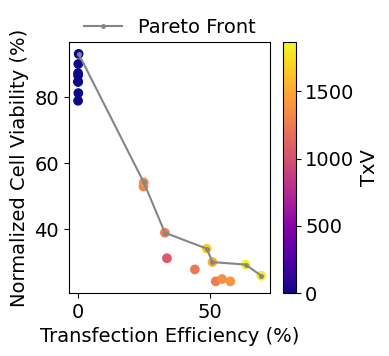

In [54]:
# Set global font size to 14 for all text in the plot
plt.rcParams.update({'font.size': 14})

color_gray = "#818689"
df['TxV'] = df['Viability'] * df['Transfection']

# Use the plasma colormap for a vibrant yet complementary color scheme
colormap = plt.cm.plasma
normalize = mcolors.Normalize(vmin=min(df['TxV']), vmax=max(df['TxV']))

plt.figure(figsize=(3.25, 3.25))
sc = plt.scatter(df['Transfection'], df['Viability'], c=df['TxV'], cmap=colormap, norm=normalize)
plt.colorbar(sc, label='TxV')

df_sorted = df.sort_values(['Transfection', 'Viability'], ascending=[False, False])
pareto_front_df = df_sorted.copy()
pareto_front_df['CumMax'] = pareto_front_df['Viability'].cummax()
pareto_front = pareto_front_df[pareto_front_df['Viability'] >= pareto_front_df['CumMax']]

# Plot the Pareto front with increased marker size for better visibility
plt.plot(pareto_front['Transfection'], pareto_front['Viability'], color=color_gray, marker='.', label='Pareto Front', markersize=5)

plt.xlabel('Transfection Efficiency (%)')
plt.ylabel('Normalized Cell Viability (%)')

# Move the legend to the top inside of the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.17), ncol=1, frameon=False)

# Reduce the number of y-ticks
plt.gca().yaxis.set_major_locator(MaxNLocator(prune='upper', nbins=4))

plt.show()
